# Aula 1
## Fazendo as primeiras visualizações

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados/monitoramento_tempo_tratado.csv', sep=',')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data,hora
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01,12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01,13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01,14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01,15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01,16:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
 7   hora                 45253 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.8+ MB


Transformar a string data no tipo datetime
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [4]:
df['data'] = pd.to_datetime(df['data'])

https://matplotlib.org/stable/index.html#

In [5]:
import matplotlib.pyplot as plt

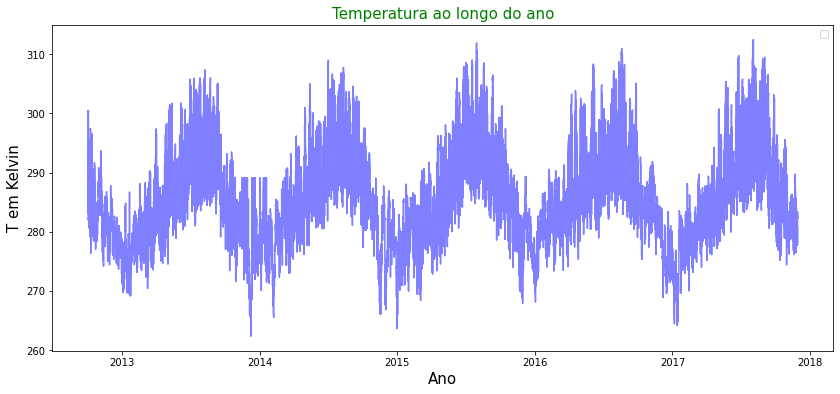

In [42]:
fig, ax = plt.subplots()

ax.set_title('Temperatura ao longo do ano', fontsize=15, color='green')
ax.set_xlabel('Ano', fontsize=15, color='black')
ax.set_ylabel('T em Kelvin', fontsize=15)
fig.set_size_inches(14,6)
ax.legend(['Temperatura'])
ax.plot(df['data'], df['temperatura'], color='blue', alpha=0.5)

Criando gráfico com plt.figure()

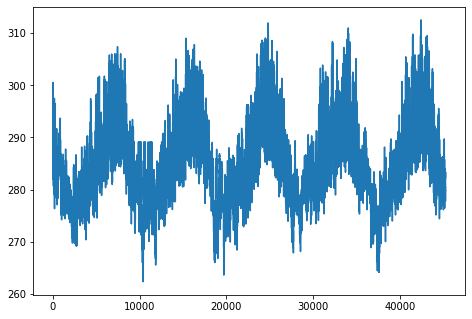

In [45]:
figure = plt.figure(figsize=(12,8))
figure.add_axes([1,1,0.5,0.5])
plt.plot(df['temperatura'])

# Aula 2
## Customizando nossas visualizações